In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split

In [4]:
(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
X = X_train_full.reshape(len(X_train_full), -1) / 255.0
y = y_train_full

In [6]:
y_binary = (y == 5).astype(int)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [9]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [10]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.9756666666666667

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     10916
           1       0.92      0.80      0.86      1084

    accuracy                           0.98     12000
   macro avg       0.95      0.90      0.92     12000
weighted avg       0.97      0.98      0.97     12000



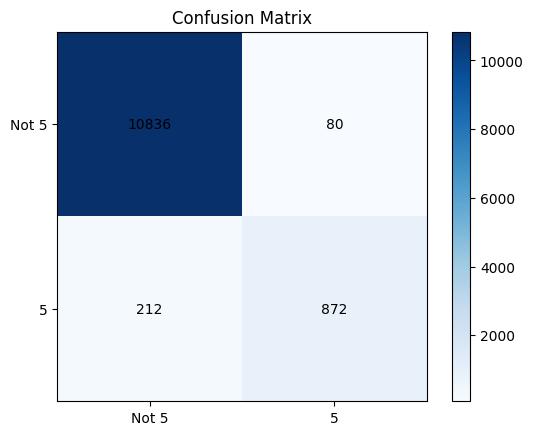

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ['Not 5', '5'])
plt.yticks([0,1], ['Not 5', '5'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i,j], ha='center', va='center')
plt.show()

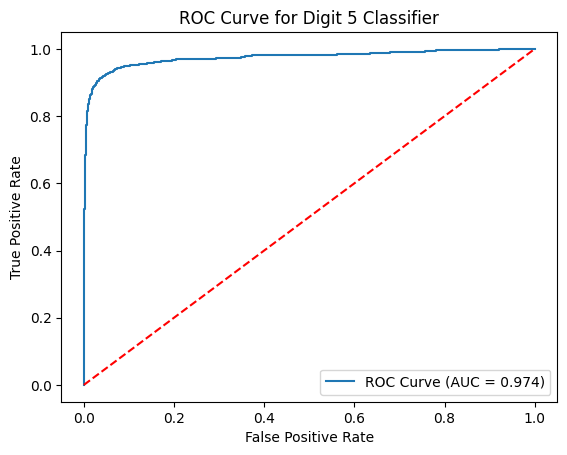

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Digit 5 Classifier")
plt.legend()
plt.show()